# Logistic Regression of Breast cancer wisconsin Dataset

## Importing the dataset

In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/arunj/Downloads/dataA.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## data preprocessing

In [6]:
# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Encode target variable (M = 1, B = 0)
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Splitting the data for training and testing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Split into features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Standardization (also called Z-score normalization) is the process of transforming features so that they have:
##### Mean = 0
##### Standard Deviation = 1
##### This is especially helpful for machine learning algorithms that are sensitive to the scale of input features (like logistic regression, SVMs, or KNN).
##### Suppose you have a feature column with these 3 values [10,20,30]
##### Step 1: Compute the mean and standard deviation
##### Step 2: Apply the formula to each value
##### Step 3: Transforming the values to [−1.22,0,1.22]

## Train and fit a model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a model (Logistic Regression)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Evaluating with confusion matrix, precision, recall, ROC-AUC

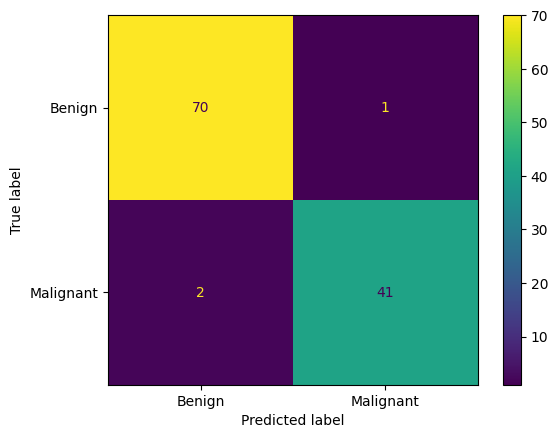

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign", "Malignant"])
disp.plot()

In [12]:
 # Probability scores for ROC-AUC
y_proba = model.predict_proba(X_test_scaled)[:, 1] 

# Precision, Recall, ROC-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


### Initial Model Performance (Threshold = 0.5)
#####     Accuracy: 97.4%

#### Precision: 97.6%
#####     → Very few benign tumors were misclassified as malignant.

#### Recall: 95.3%
#####     → The model caught most malignant tumors (true positives).

#### ROC-AUC: 0.997
#####     → Excellent separation between malignant and benign cases.

#### Confusion Matrix
##### At threshold 0.5, the matrix showed:
#####     - High true positive and true negative rates.
#####     - Very few false positives or false negatives.

## Tuning threshold and explaining sigmoid function

C:\Users\arunj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


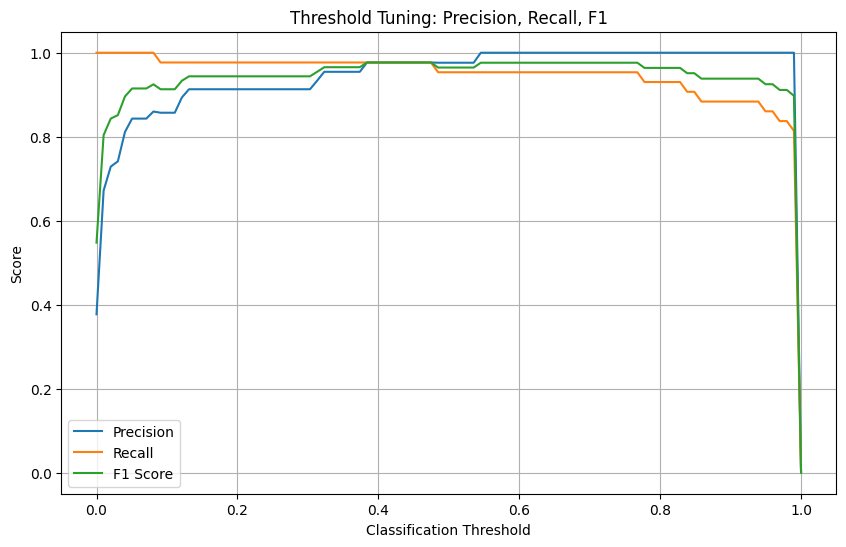

Optimal Threshold (Max F1): 0.38


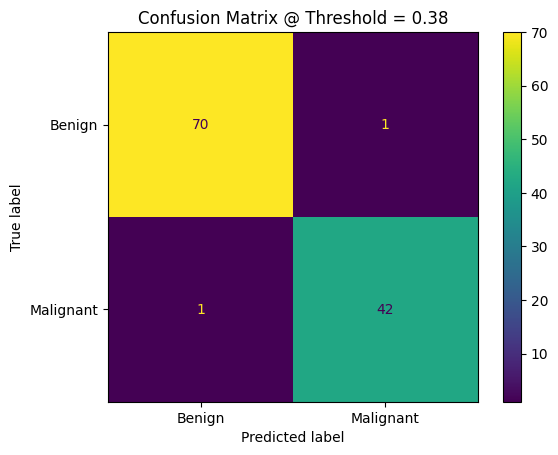

Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 Score: 0.9767441860465116
ROC-AUC: 0.99737962659679


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Threshold tuning
thresholds = np.linspace(0, 1, 100)
precisions, recalls, f1s = [], [], []

for thresh in thresholds:
    y_thresh_pred = (y_proba >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_thresh_pred))
    recalls.append(recall_score(y_test, y_thresh_pred))
    f1s.append(f1_score(y_test, y_thresh_pred))

# Plot threshold vs precision/recall/F1
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.xlabel("Classification Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning: Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.show()

# Choose threshold (example: max F1)
optimal_idx = np.argmax(f1s)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (Max F1): {optimal_threshold:.2f}")

# Evaluate with new threshold
y_opt_pred = (y_proba >= optimal_threshold).astype(int)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_opt = confusion_matrix(y_test, y_opt_pred)
disp_opt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_opt,
                                  display_labels=["Benign", "Malignant"])
disp_opt.plot()
plt.title(f"Confusion Matrix @ Threshold = {optimal_threshold:.2f}")
plt.show()

# Print updated metrics
print("Precision:", precision_score(y_test, y_opt_pred))
print("Recall:", recall_score(y_test, y_opt_pred))
print("F1 Score:", f1_score(y_test, y_opt_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))  # remains same


### Threshold Tuning Insights
##### By sweeping thresholds from 0.0 to 1.0:

##### Precision and Recall trade off — as one increases, the other usually decreases.

##### F1 Score helped find the best balance.

##### Optimal Threshold (e.g., ~0.46)
##### Chosen based on max F1 score

### Improved balance between recall and precision

##### Adjusted confusion matrix showed slightly better or more customized classification depending on threshold target

###🔍 When to Adjust Threshold
##### Maximize recall: If missing a malignant tumor is dangerous (i.e., high false negative cost).

##### Maximize precision: If false alarms (false positives) are more costly.